In [204]:
from __future__ import annotations

import math
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy

import importlib

import template, utility
[importlib.reload(lib) for lib in (template, utility)]

[<module 'template' from '/Users/barrels/Documents/Projects/RL/Rl Batrlow Andrew/template.py'>,
 <module 'utility' from '/Users/barrels/Documents/Projects/RL/Rl Batrlow Andrew/utility.py'>]

Eg 4.1) GridWorld

In [205]:
class GridWorld:

    S = set(tuple(range(1, 15))+('t',))

    A = set(('up', 'down', 'left', 'right'))

    def next_state_and_reward_probabilities(self, s, a):
        """Returns tuple with elements as p, s_, r (i.e probability, next state and reward)"""
        if s == 't': ans = 't', 0
        
        elif a == 'up':
            if s==4: ans = 't', -1
            elif s-4 > 0: ans = s-4, -1
            else: ans = s, -1
        
        elif a == 'down':
            if s==11: ans = 't', -1
            elif s+4 < 15: ans =  s+4, -1
            else: ans = s, -1
        
        elif a == 'left':
            if s==1: ans = 't', -1
            elif s%4 != 0: ans = s-1, -1
            else: ans = s, -1
        
        elif a == 'right':
            if s==14: ans = 't', -1
            elif s%4 != 3: ans = s+1, -1
            else: ans = s, -1

        return ((1, ans[0], ans[1]),)

    def plot(self, V):
        vals = [V['t']] + [V[i] for i in range(1, 15)] + [V['t']]
        for i in range(4):
            for j in range(4):
                print(f'{vals.pop(0):6.4f}', end=' ')
            print()
        print()

gridworld = GridWorld()

In [206]:
def equiprobable_random_policy(s, A):
    len_A = len(A)
    return (1/len_A,) * len_A

In [207]:
def iterative_policy_evaluation(world: GridWorld, policy_action_probs, V=None, thetha=0.1, gamma=0.9, plotter=None, do_plot=False):

    if plotter is None and hasattr(world, 'plot'): plotter = world.plot

    if V is None:
        V = {}
        for s in world.S:
            V[s] = 0

    if do_plot and plotter: plotter(V)

    while True:
        delta = 0

        for s in world.S:
            v = V[s]

            V[s] = 0
            for a, policy_action_probability in zip(world.A, policy_action_probs(s, world.A)):
                for next_state_prob, s_, r in world.next_state_and_reward_probabilities(s, a):
                    V[s] += policy_action_probability * next_state_prob * (r + gamma * V[s_])

            delta = max(delta, abs(v - V[s]))

        if do_plot and plotter: plotter(V)
        
        if delta < thetha: break

    return V

In [208]:
iterative_policy_evaluation(gridworld, equiprobable_random_policy, thetha=0.01, gamma=1, do_plot=True)

0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 

0.0000 -1.1875 -1.5586 -1.7527 
-1.1250 -1.5781 -1.7842 -1.9467 
-1.4062 -1.7461 -1.8826 -2.0198 
-1.4766 -1.8057 -1.9221 0.0000 

0.0000 -2.1677 -2.9702 -2.9542 
-2.0576 -2.9389 -3.4346 -3.2909 
-2.6465 -3.3184 -3.6737 -2.8037 
-2.3509 -2.8978 -2.6429 0.0000 

0.0000 -3.0341 -4.1322 -3.8424 
-2.8704 -4.1644 -4.8153 -4.1031 
-3.6143 -4.5876 -4.7123 -3.2664 
-2.9341 -3.5411 -3.0634 0.0000 

0.0000 -3.7802 -5.0743 -4.4541 
-3.5558 -5.1847 -5.7686 -4.6389 
-4.3645 -5.4507 -5.3873 -3.5690 
-3.3227 -3.9592 -3.3366 0.0000 

0.0000 -4.3935 -5.7551 -4.8762 
-4.1091 -5.9305 -6.4279 -5.0038 
-4.8940 -6.0427 -5.8441 -3.7745 
-3.5857 -4.2413 -3.5213 0.0000 

0.0000 -4.8392 -6.2323 -5.1678 
-4.5076 -6.4544 -6.8836 -5.2549 
-5.2608 -6.4501 -6.1574 -3.9156 
-3.7656 -4.4343 -3.6479 0.0000 

0.0000 -5.1521 -6.5636 -5.3694 
-4.7860 -6.8180 -7.1985 -5.4281 
-5.5139 -6.7309 -6.3732 -4.0128 

{1: -5.837163204832155,
 2: -7.286282947468542,
 3: -5.808388720801365,
 4: -5.392998434758974,
 5: -7.60974658183163,
 6: -7.883245828131575,
 7: -5.804701901547776,
 8: -6.06297994676307,
 9: -7.34018602265264,
 10: -6.8417936717736785,
 11: -4.224123893330364,
 12: -4.156842657336515,
 13: -4.85475826762328,
 14: -3.9241379848492395,
 't': 0.0}

In [209]:
def policy_iteration(world: GridWorld, V=None, policy=None, thetha=0.1, gamma=0.9, plotter=None, do_plot=False, do_eval_plot=False):

    if plotter is None and hasattr(world, 'plot'): plotter = world.plot

    if V is None:
        V = {}
        for s in world.S:
            V[s] = 0

    if policy is None:
        policy = {}
        for s in world.S:
            policy[s] = random.choice(list(world.A))

    if do_plot and plotter: plotter(V)

    while True:
        def policy_action_probs(s, A):
            return np.eye(len(A))[list(A).index(policy[s])]

        V = iterative_policy_evaluation(world, policy_action_probs, V, thetha, gamma, do_plot=do_eval_plot)

        policy_stable = True

        for s in world.S:
            old_action = policy[s]

            max_G = -math.inf

            for a in world.A:
                G = 0
                for next_state_prob, s_, r in world.next_state_and_reward_probabilities(s, a):
                    G = next_state_prob * (r + gamma * V[s_])
                    
                if max_G < G:
                    policy[s] = a
                    max_G = G

            if old_action != policy[s]:
                policy_stable = False

        if do_plot and plotter: plotter(V)

        if policy_stable: break

    return V

In [210]:
policy_iteration(gridworld, thetha=0.1, gamma=0.9, do_plot=True)

0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 

0.0000 -9.7747 -9.7972 -9.8175 
-1.0000 -1.9000 -9.8175 -1.0000 
-9.7497 -9.7972 -9.7972 -1.0000 
-9.7747 -9.8175 -9.8358 0.0000 

0.0000 -1.0000 -1.9000 -2.7100 
-1.0000 -1.9000 -2.7100 -1.9000 
-1.9000 -2.7100 -1.9000 -1.0000 
-2.7100 -3.4390 -1.0000 0.0000 

0.0000 -1.0000 -1.9000 -2.7100 
-1.0000 -1.9000 -2.7100 -1.9000 
-1.9000 -2.7100 -1.9000 -1.0000 
-2.7100 -1.9000 -1.0000 0.0000 

0.0000 -1.0000 -1.9000 -2.7100 
-1.0000 -1.9000 -2.7100 -1.9000 
-1.9000 -2.7100 -1.9000 -1.0000 
-2.7100 -1.9000 -1.0000 0.0000 



{1: -1.0,
 2: -1.9,
 3: -2.71,
 4: -1.0,
 5: -1.9,
 6: -2.71,
 7: -1.9,
 8: -1.9,
 9: -2.71,
 10: -1.9,
 11: -1.0,
 12: -2.71,
 13: -1.9,
 14: -1.0,
 't': 0.0}

In [ ]:
factorials = [1]
for i in range(1, 12):
    factorials.append(factorials[-1]*i)

def poission_prob(l, n):
    return l ** n / factorials[n] * math.exp(-l)

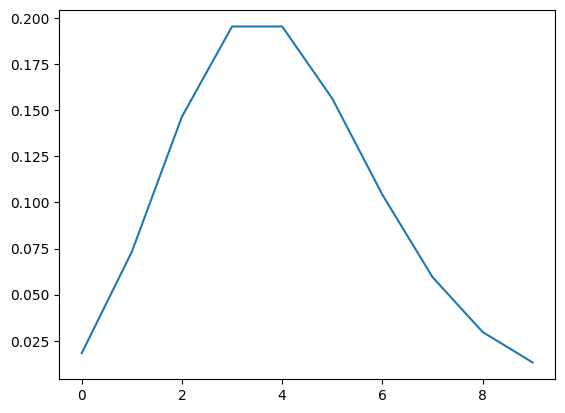

In [225]:
n = 10
x = np.linspace(0, n-1, n)
l = 4  # lambda
y = l ** x / scipy.special.factorial(x) * math.exp(-l)
y = [poission_prob(l, int(xi)) for xi in x]

plt.plot(x, y)

In [215]:
class JackCarRentalWorld:

    # Poission distribution arguments
    request_i_lambda = 3
    request_j_lambda = 4
    return_i_lambda = 3
    return_j_lambda = 2
    
    S = {(i, j) for i in range(21) for j in range(21)}

    A = set(range(-5, 6))

    def next_state_and_reward_probabilities(self, s, a):
        """Returns p, s_, r (i.e probability, next state and reward)"""
        i, j = s

        results = []

        max_requests = 10
        max_returns = 10
        for request_i in range(0, max_requests+1):
            for request_j in range(0, max_requests+1):
                for return_i in range(0, max_returns+1):
                    for return_j in range(0, max_returns+1):
                        prob = poission_prob(self.request_i_lambda, request_i)
                        prob *= poission_prob(self.request_j_lambda, request_j)
                        prob *= poission_prob(self.return_i_lambda, return_i)
                        prob *= poission_prob(self.return_j_lambda, return_j)
                        i_ = min(20, max(0, i - request_i) + return_i)
                        j_ = min(20, max(0, j - request_j) + return_j)
                        reward = min(i, request_i) * 10 + min(j, request_j) * 10 - abs(a) * 2
                        results.append((prob, (i_, j_), reward))

        return results

    def plot(self, V):
        for i in range(21):
            for j in range(21):
                print(V[(i, j)], end=' ')
            print()

        print()

jackcarrentalworld = JackCarRentalWorld()

In [217]:
#jackcarrentalworld.next_state_and_reward_probabilities((10, 10), 5)

In [218]:
policy_iteration(jackcarrentalworld, thetha=0.1, gamma=0.9, do_plot=True, do_eval_plot=True)

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0

KeyboardInterrupt: 